
Importing libraries and dataset


In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import joblib



import the  dataset

In [2]:
dt = pd.read_csv("./Data/Data.csv")

In [3]:
dt["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

Separating Independent and Dependent 


In [4]:
x = dt["Text"]
y = dt["Language"]

Label Encoding


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(le.classes_) 


['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Malayalam' 'Portugeese' 'Russian' 'Spanish'
 'Sweedish' 'Tamil' 'Turkish']


Text Preprocessing


In [6]:
dt_list = [
    re.sub(r'\s+', ' ', re.sub(r'[!@#$(),\n"%^*?:;~`0-9\[\]]', ' ', text)).lower().strip()
    for text in x
]

Bag of Words


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_vectorized = cv.fit_transform(dt_list).toarray()
x.shape 

(10337,)

Train Test Splitting


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y_encoded, test_size=0.20, random_state=42)

Model Training and Prediction


In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(x_test)

Save the Model

Model Evaluation


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)


Accuracy is : 0.9830754352030948


heatmap

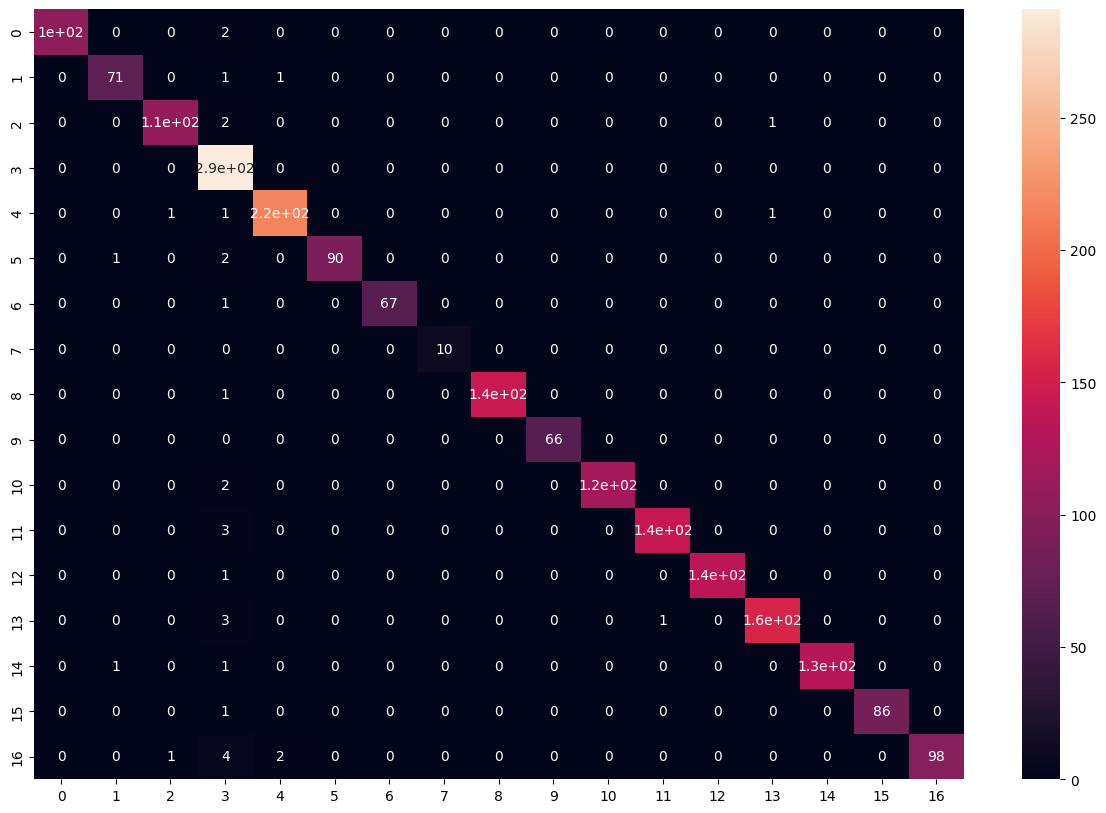

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

Predicting with some more data


In [13]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang_code = model.predict(x)
    lang_name = le.inverse_transform(lang_code)
    print("The language is:", lang_name[0])


In [14]:
predict("¡Hola! Tengo la edad de Ravita Kavish.")
predict("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")
predict("Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")




The language is: Spanish
The language is: Arabic
The language is: French


In [15]:
import pickle

pickle.dump(model, open('model/language_model.pkl', 'wb'))
pickle.dump(cv, open('model/cv.pkl', 'wb'))
pickle.dump(le, open('model/label_encoder.pkl', 'wb'))